In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import nltk

In [3]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [4]:
massages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [5]:
len(massages)

5574

In [6]:
for mag_no,massage in enumerate(massages[:5]):
    print(mag_no,' ',massage)

0   ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
1   ham	Ok lar... Joking wif u oni...
2   spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3   ham	U dun say so early hor... U c already then say...
4   ham	Nah I don't think he goes to usf, he lives around here though


In [7]:
for m in massages[:5]:
    print(m)

ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
ham	Ok lar... Joking wif u oni...
spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
ham	U dun say so early hor... U c already then say...
ham	Nah I don't think he goes to usf, he lives around here though


In [8]:
data = pd.read_csv('smsspamcollection/SMSSpamCollection',sep='\t',names=['lebel','Massage'])

In [9]:
data.head()

,lebel,Massage
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
data.describe()

,lebel,Massage
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lebel    5572 non-null   object
 1   Massage  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [12]:
data.groupby('lebel').describe()

Massage                                                               
        count unique                                                top freq
lebel                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [13]:
data['length'] = data['Massage'].apply(len)

In [14]:
data.head()

,lebel,Massage,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


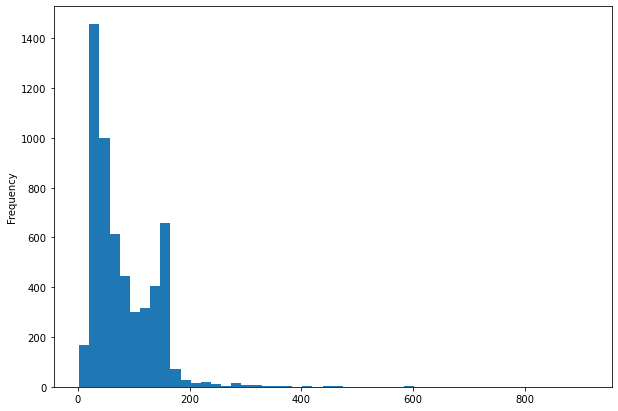

In [15]:
plt.figure(figsize=(10,7))
data['length'].plot.hist(bins=50)

In [16]:
data[data['length']>900]

,lebel,Massage,length
1085,ham,For me the love should start with attraction.i...,910


In [17]:
data.max()

lebel                                                   spam
Massage    … we r stayin here an extra week, back next we...
length                                                   910
dtype: object

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000211E1FFDE20>,
      dtype=object)

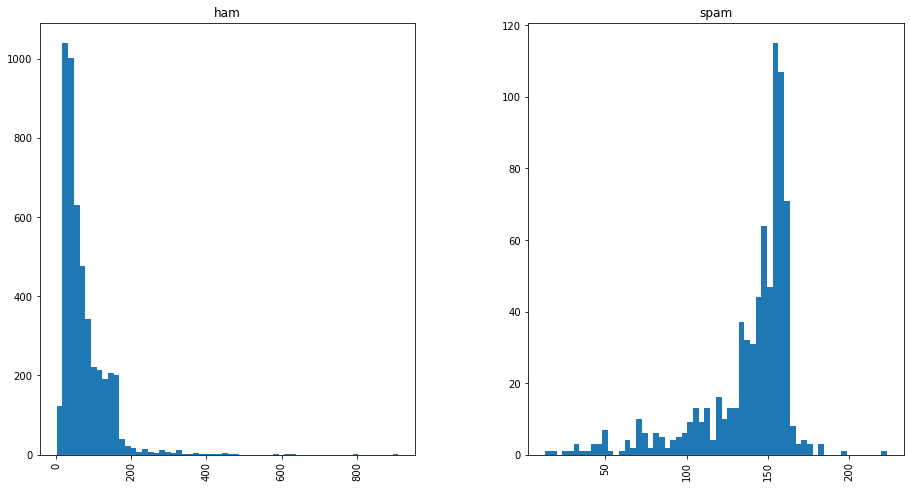

In [18]:
data.hist(column='length',by='lebel',bins=60,figsize=(15,8))

In [19]:
import string

In [20]:
mess = "Sample Massage! Notice: it has punctuation"

In [21]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [22]:
nopunc = []
for i in mess:
    if i not in string.punctuation:
        nopunc.append(i)

In [23]:
nopunc

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'M',
 'a',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'i',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

In [24]:
nopunc = "".join(nopunc)

In [25]:
nopunc

'Sample Massage Notice it has punctuation'

In [26]:
words = nopunc.split()

In [27]:
words

['Sample', 'Massage', 'Notice', 'it', 'has', 'punctuation']

In [28]:
from nltk.corpus import stopwords

In [29]:
clean_mess = []
for word in words:
    if word not in stopwords.words('english'):
        clean_mess.append(word)

In [30]:
clean_mess

['Sample', 'Massage', 'Notice', 'punctuation']

In [31]:
def text_process(msg):
    text = []
    text2 = []
    for i in msg:
        if i not in string.punctuation:
            text.append(i)
    text = "".join(text)
    for j in text.split():
        if j not in stopwords.words('english'):
            text2.append(j)
    return text2

In [32]:
data.head(5)

,lebel,Massage,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [33]:
data['Massage'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, I, dont, think, goes, usf, lives, around...
Name: Massage, dtype: object

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

In [35]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(data['Massage'])

In [36]:
print(len(bow_transformer.vocabulary_))

11617


In [37]:
mess4 = data['Massage'][3]

In [38]:
print(mess4)

U dun say so early hor... U c already then say...


In [39]:
bow4 = bow_transformer.transform([mess4])

In [40]:
print(bow4)

  (0, 4221)	2
  (0, 4821)	1
  (0, 5453)	1
  (0, 6396)	1
  (0, 6414)	1
  (0, 7378)	1
  (0, 9746)	2


In [41]:
bow4.shape

(1, 11617)

In [42]:
bow_transformer.get_feature_names()[9746]

'say'

In [44]:
massages_bow = bow_transformer.transform(data['Massage'])

In [45]:
massages_bow.shape

(5572, 11617)

In [46]:
massages_bow.nnz

56024

In [57]:
sparsity = (100.0 * massages_bow.nnz / (massages_bow.shape[0] * massages_bow.shape[1]))
print('sparsity: {}'.format(round(sparsity)))

sparsity: 0


In [52]:
from sklearn.feature_extraction.text import TfidfTransformer

In [53]:
tfidf_transformer = TfidfTransformer().fit(massages_bow)

In [54]:
tfidf4 = tfidf_transformer.transform(bow4)

In [55]:
print(tfidf4)

  (0, 9746)	0.5385626262927564
  (0, 7378)	0.4389365653379857
  (0, 6414)	0.3187216892949149
  (0, 6396)	0.29953799723697416
  (0, 5453)	0.29729957405868723
  (0, 4821)	0.26619801906087187
  (0, 4221)	0.40832589933384067


In [58]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

In [59]:
massages_tfidf = tfidf_transformer.transform(massages_bow)

In [62]:
massages_tfidf

<5572x11617 sparse matrix of type '<class 'numpy.float64'>'
	with 56024 stored elements in Compressed Sparse Row format>

In [63]:
from sklearn.naive_bayes import MultinomialNB

In [64]:
spam_detect_model = MultinomialNB().fit(massages_tfidf,data['lebel'])

In [66]:
spam_detect_model.predict(tfidf4)[0]

'ham'

In [67]:
data['lebel'][3]

'ham'

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X = data['Massage']
y = data['lebel']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [71]:
from sklearn.pipeline import Pipeline

In [72]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

In [73]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x00000211E250B280>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [74]:
predictions = pipeline.predict(X_test)

In [75]:
from sklearn.metrics import classification_report

In [78]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1475
        spam       1.00      0.65      0.79       197

    accuracy                           0.96      1672
   macro avg       0.98      0.82      0.88      1672
weighted avg       0.96      0.96      0.95      1672



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
yelp = pd.read_csv('yelp.csv')

In [3]:
yelp.head(3)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0


In [4]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [5]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [6]:
yelp['text length'] = yelp['text'].apply(len)

In [7]:
yelp.head(2)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345


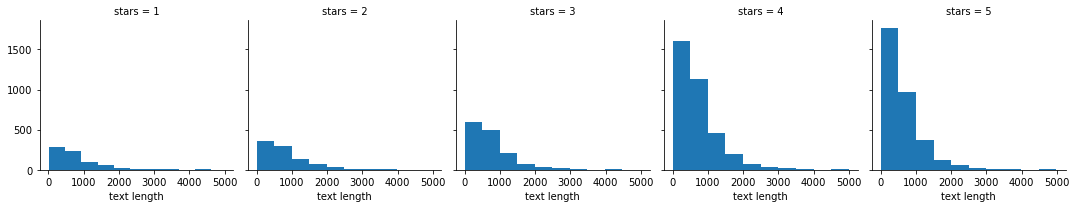

In [8]:
g = sns.FacetGrid(yelp,col='stars')
g.map(plt.hist,'text length')

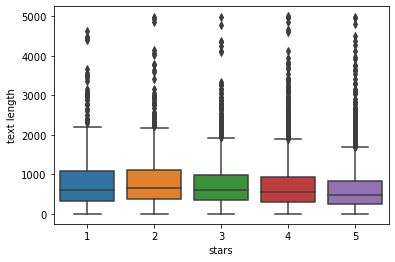

In [9]:
sns.boxplot(x='stars',y='text length',data=yelp)

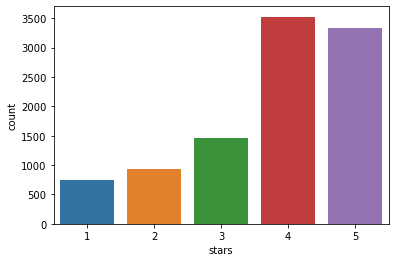

In [10]:
sns.countplot(yelp['stars'])

In [11]:
star=yelp.groupby('stars').mean()
star

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


In [12]:
star.corr()

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text length,-0.857664,0.699881,0.843461,1.000000


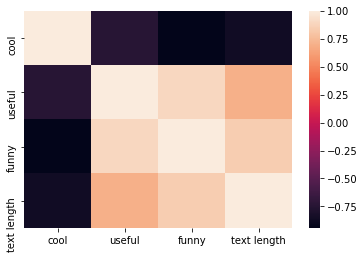

In [13]:
sns.heatmap(star.corr())

In [14]:
yelp_class = yelp[(yelp.stars==1) | (yelp.stars==5)]

In [15]:
X = yelp_class['text']
y = yelp_class['stars']

In [16]:
from sklearn.model_selection import train_test_split

In [18]:
from sklearn.pipeline import Pipeline

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

In [20]:
from sklearn.feature_extraction.text import TfidfTransformer

In [21]:
from sklearn.naive_bayes import MultinomialNB

In [22]:
import string
from nltk.corpus import stopwords

In [23]:
cv = CountVectorizer()

In [24]:
X = cv.fit_transform(X)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [26]:
nb = MultinomialNB()

In [27]:
nb.fit(X_train,y_train)

MultinomialNB()

In [28]:
pred = nb.predict(X_test)

In [30]:
from sklearn.metrics import classification_report,confusion_matrix

In [31]:
print(confusion_matrix(pred,y_test))
print('\n')
print(classification_report(pred,y_test))

[[159  22]
 [ 69 976]]


              precision    recall  f1-score   support

           1       0.70      0.88      0.78       181
           5       0.98      0.93      0.96      1045

    accuracy                           0.93      1226
   macro avg       0.84      0.91      0.87      1226
weighted avg       0.94      0.93      0.93      1226



In [32]:
def text_process(msg):
    text = []
    text2 = []
    for i in msg:
        if i not in string.punctuation:
            text.append(i)
    text = "".join(text)
    for j in text.split():
        if j not in stopwords.words('english'):
            text2.append(j)
    return text2

In [38]:
pipelin = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

In [39]:
X = yelp_class['text']
y = yelp_class['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [40]:
pipelin.fit(X_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x0000020B7F964C10>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [41]:
predictions = pipelin.predict(X_test)

In [42]:
print(confusion_matrix(predictions,y_test))
print('\n')
print(classification_report(predictions,y_test))

[[  0   0]
 [228 998]]


              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           5       1.00      0.81      0.90      1226

    accuracy                           0.81      1226
   macro avg       0.50      0.41      0.45      1226
weighted avg       1.00      0.81      0.90      1226



C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
